In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Credit Card dataset
data = pd.read_csv("creditcard.csv")

# Success
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# DATA VISUALIZATION

Text(0, 0.5, 'Frequency')

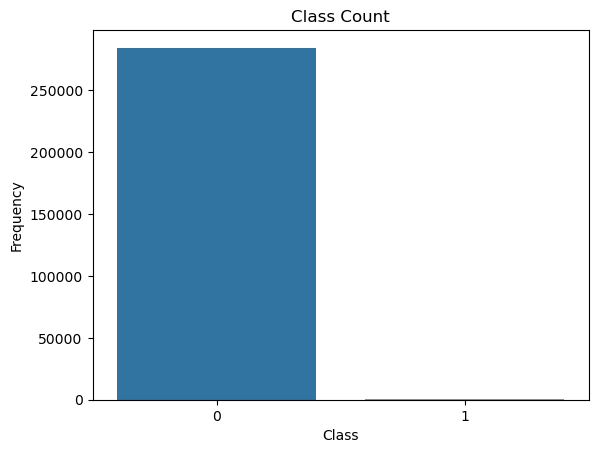

In [2]:
sns.countplot(x="Class", data=data)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [7]:
fraud = data[data.Class == 1]
normal = data[data.Class == 0]

# TEST SPLITING

In [5]:

x = data.drop('Class', axis = 1)
y = data['Class']
     

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
     

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (227845, 30)
The shape of X_test is: (56962, 30)
The shape of y_train is: (227845,)
The shape of y_test is: (56962,)



# LOGISTIC REGRESION


In [8]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train,y_train)
logisticRegression_pred = logisticRegression.predict(X_test)
logisticRegression_acc = accuracy_score(y_test, logisticRegression_pred)

C:\Users\mpava\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 99.8631%
Recall:  0.5612244897959183
ROC AUC:  0.7803044930690339
precision score:  0.6111111111111112
f1 score:  0.5851063829787235
confusion matrix:
 [[56829    35]
 [   43    55]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

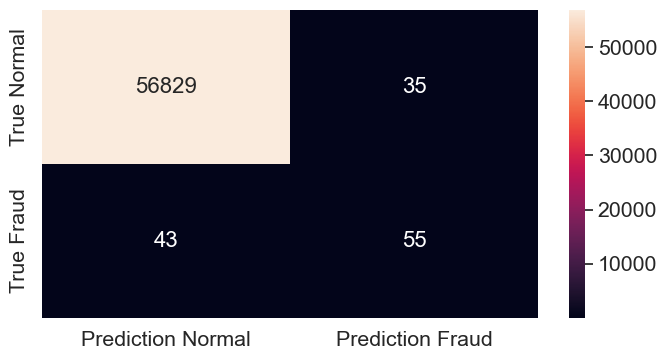

In [10]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score,precision_score,f1_score,classification_report
import seaborn as sns
from matplotlib import pyplot

lr_accuracy = accuracy_score(y_test, logisticRegression_pred)
lr_recall = recall_score(y_test, logisticRegression_pred)
lr_cm = confusion_matrix(y_test, logisticRegression_pred)
lr_auc = roc_auc_score(y_test, logisticRegression_pred)
lr_precision = precision_score(y_test, logisticRegression_pred)
lr_f1 = f1_score(y_test, logisticRegression_pred)
lr_cl = classification_report(y_test, logisticRegression_pred)

print("Accuracy of Logistic Regression: {:.4%}".format(lr_accuracy))
print("Recall: ",(lr_recall))
print("ROC AUC: ",(lr_auc))
print("precision score: ",(lr_precision))
print("f1 score: ",(lr_f1))
print("confusion matrix:\n",(lr_cm))
print("classification report:\n",(lr_cl))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

# Random Forest

In [18]:
randomForestCls = RandomForestClassifier()
randomForestCls.fit(X_train, y_train)
randomForestCls_pred = randomForestCls.predict(X_test)
randomForestCls_acc = accuracy_score(y_test ,randomForestCls_pred)

Accuracy of Random Forest: 99.9579%
Recall:  0.7857142857142857
ROC AUC:  0.8928307641289491
precision score:  0.9625
f1 score:  0.8651685393258427
confusion matrix:
 [[56861     3]
 [   21    77]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

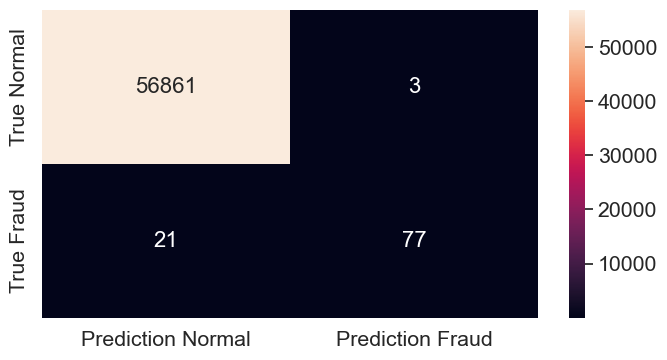

In [20]:
rf_accuracy = accuracy_score(y_test, randomForestCls_pred )
rf_recall = recall_score(y_test, randomForestCls_pred )
rf_cm = confusion_matrix(y_test, randomForestCls_pred )
rf_auc = roc_auc_score(y_test, randomForestCls_pred )
rf_precision = precision_score(y_test, randomForestCls_pred )
rf_f1 = f1_score(y_test, randomForestCls_pred )
rf_cl = classification_report(y_test, randomForestCls_pred )

print("Accuracy of Random Forest: {:.4%}".format(rf_accuracy))
print("Recall: ",(rf_recall))
print("ROC AUC: ",(rf_auc))
print("precision score: ",(rf_precision))
print("f1 score: ",(rf_f1))
print("confusion matrix:\n",(rf_cm))
print("classification report:\n",(rf_cl))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

# SVC

In [19]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)

Accuracy of SVC: 99.8280%
Recall:  0.0
ROC AUC:  0.5
precision score:  0.0
f1 score:  0.0
confusion matrix:
 [[56864     0]
 [   98     0]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

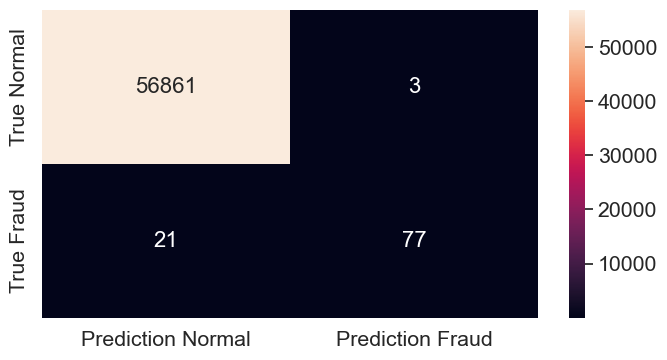

In [23]:
svm_accuracy = accuracy_score(y_test, svc_pred )
svm_recall = recall_score(y_test, svc_pred )
svm_cm = confusion_matrix(y_test, svc_pred )
svm_auc = roc_auc_score(y_test, svc_pred )
svm_precision = precision_score(y_test, svc_pred )
svm_f1 = f1_score(y_test, svc_pred )
svm_cl = classification_report(y_test, svc_pred )

print("Accuracy of SVC: {:.4%}".format(svm_accuracy))
print("Recall: ",(svm_recall))
print("ROC AUC: ",(svm_auc))
print("precision score: ",(svm_precision))
print("f1 score: ",(svm_f1))
print("confusion matrix:\n",(svm_cm))
print("classification report:\n",(svm_cl))

svm_cm = pd.DataFrame(svm_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

# K-MEANS

In [30]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0)
kmeans.fit(X_train, y_train)

KMeans(max_iter=200, n_clusters=2, random_state=0)

In [43]:
kmeans_pred= kmeans.predict(X_test)
kmeans_acc = accuracy_score(y_test, kmeans_pred)

Accuracy of K-means: 53.7042%
Recall:  0.32653061224489793
ROC AUC:  0.43196782441170045
precision score:  0.001215020693321183
f1 score:  0.00242103272177038
confusion matrix:
 [[30559 26305]
 [   66    32]]
classification report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70     56864
           1       0.00      0.33      0.00        98

    accuracy                           0.54     56962
   macro avg       0.50      0.43      0.35     56962
weighted avg       1.00      0.54      0.70     56962



<Axes: >

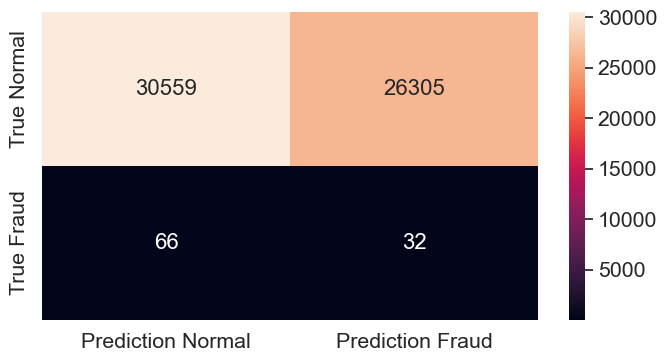

In [44]:
km_accuracy = accuracy_score(y_test, kmeans_pred)
km_recall = recall_score(y_test, kmeans_pred)
km_cm = confusion_matrix(y_test, kmeans_pred)
km_auc = roc_auc_score(y_test, kmeans_pred)
km_precision = precision_score(y_test, kmeans_pred)
km_f1 = f1_score(y_test, kmeans_pred)
km_cl = classification_report(y_test, kmeans_pred)

print("Accuracy of K-means: {:.4%}".format(km_accuracy))
print("Recall: ",(km_recall))
print("ROC AUC: ",(km_auc))
print("precision score: ",(km_precision))
print("f1 score: ",(km_f1))
print("confusion matrix:\n",(km_cm))
print("classification report:\n",(km_cl))

km_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(km_cm, annot=True,annot_kws={"size": 16},fmt='g')

# WHICH MODEL IS BETTER

In [46]:
Prediction_Accuracy={
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'SVC': svm_accuracy,
    'Kmeans': km_accuracy
}

Prediction_Recall={
    'Logistic Regression': lr_recall,
    'Random Forest': rf_recall,
    'SVC': svm_recall,
    'Kmeans': km_recall
}

Prediction_AUC={
    'Logistic Regression': lr_auc,
    'Random Forest': rf_auc,
    'SVC': svm_auc,
    'Kmeans': km_auc
}

Prediction_f1_score={
    'Logistic Regression': lr_f1,
    'Random Forest': rf_f1,
    'SVC': svm_f1,
    'Kmeans': km_f1
}

Text(0.5, 0, 'Accuracy Score')

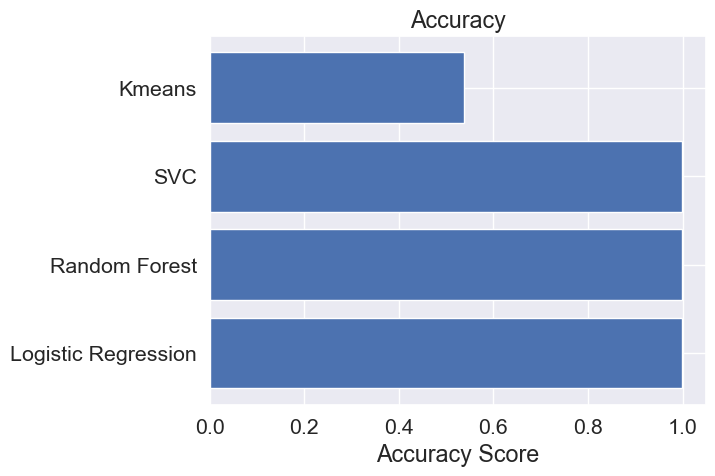

In [47]:
pyplot.title('Accuracy')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy Score')

Text(0.5, 0, 'Recall Score')

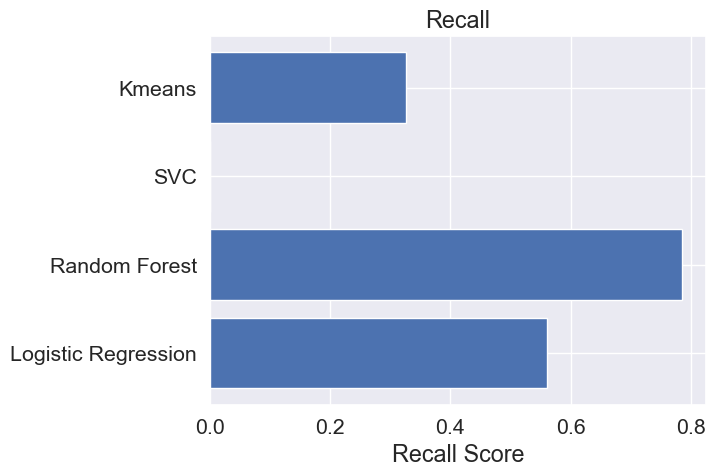

In [48]:
pyplot.title('Recall')
pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
pyplot.xlabel('Recall Score')

Text(0.5, 0, 'AUC Score')

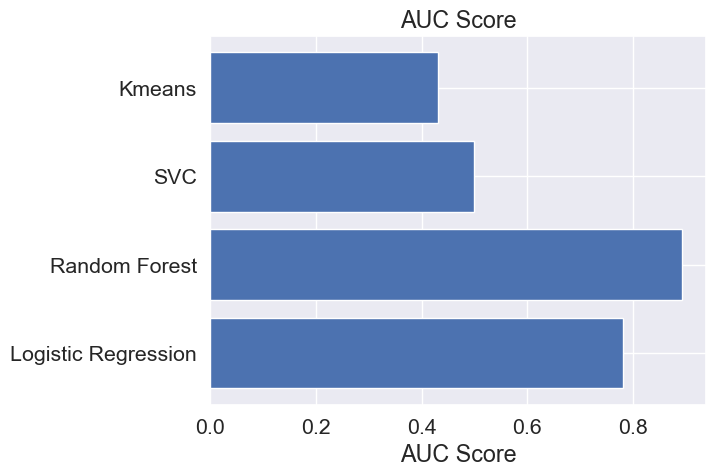

In [49]:
pyplot.title('AUC Score')
pyplot.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center')
pyplot.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
pyplot.xlabel('AUC Score')

Text(0.5, 0, 'f1 Score')

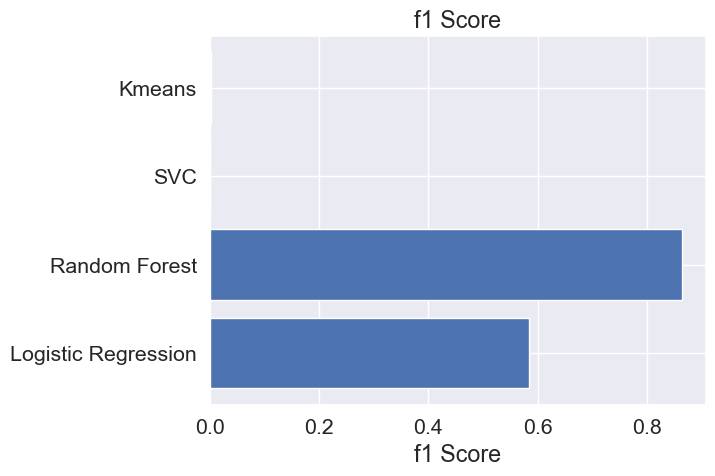

In [50]:
pyplot.title('f1 Score')
pyplot.barh(range(len(Prediction_f1_score)), list(Prediction_f1_score.values()), align='center')
pyplot.yticks(range(len(Prediction_f1_score)), list(Prediction_f1_score.keys()))
pyplot.xlabel('f1 Score')

In [51]:
from prettytable import PrettyTable
Table = PrettyTable(["Algorithm", "Accuracy"])
Table.add_row(["LogisticRegression", logisticRegression_acc])
Table.add_row(["SVC", svc_acc])
Table.add_row(["RandomForestClassifier", randomForestCls_acc])
Table.add_row(["K-Means",kmeans_acc])
print(Table)

+------------------------+--------------------+
|       Algorithm        |      Accuracy      |
+------------------------+--------------------+
|   LogisticRegression   | 0.9986306660580738 |
|          SVC           | 0.9982795547909132 |
| RandomForestClassifier | 0.9995786664794073 |
|        K-Means         | 0.5370422386854394 |
+------------------------+--------------------+
